In [3]:
import os
import csv
import re
import numpy as np

In [4]:
base = os.path.join("outputs_ssh", "noisy_data_NEW", "chirp", "1_nodes_given")
noise = [0, 5, 10, 15, 20]
init_error = [
    -15,
    -20,
    -25,
    -30,
    15,
    20,
    25,
    30,
]

errors = np.zeros([len(noise), len(init_error)])

init_predict_actual_pd_table = r"\begin{table}[H] \centering \begin{tabular}{c|cccc} \hline \textbf{\% Noise} & \textbf{\%Initial Error} & \textbf{Initial $E$ [Pa]} & \textbf{Predicted $E$ [Pa]} & \textbf{Actual $E$ [Pa]} & \textbf{Percent Difference} \\ \hline"

for i, n in enumerate(noise):
    for j, e in enumerate(init_error):
        # fullpath = os.path.join(base, f"{n}%_noise", f"{e}%_init_error", "result.png")
        # try:
        #     os.rename(fullpath, f"{n}_noise_{e}_error.png")
        # except:
        #     pass

        fullpath = os.path.join(
            base, f"{n}%_noise", f"{e}%_init_error", "loss_history.csv"
        )

        with open(fullpath, "r") as f:
            reader = csv.reader(f)
            reader = list(reader)

            pattern = r"tensor\(([-+]?\d*\.\d+|[-+]?\d+(?:e[-+]?\d+)?)"

            init_E = float(re.search(pattern, reader[1][5]).group(1))
            final_E = float(re.search(pattern, reader[-1][5]).group(1))

            E = 69230768
            percent_error = np.abs(E - final_E) / E * 100

            errors[i, j] = percent_error

            init_predict_actual_pd_table += f" {n}\% & {e}\% & {init_E} & {final_E} & {E} & {percent_error: .2f} \\\\"

init_predict_actual_pd_table += "\hline \end{tabular} \end{table}"

In [5]:
init_predict_actual_pd_table

'\\begin{table}[H] \\centering \\begin{tabular}{c|cccc} \\hline \\textbf{\\% Noise} & \\textbf{\\%Initial Error} & \\textbf{Initial $E$ [Pa]} & \\textbf{Predicted $E$ [Pa]} & \\textbf{Actual $E$ [Pa]} & \\textbf{Percent Difference} \\\\ \\hline 0\\% & -15\\% & 58846156.0 & 68276464.0 & 69230768 &  1.38 \\\\ 0\\% & -20\\% & 55384620.0 & 68341040.0 & 69230768 &  1.29 \\\\ 0\\% & -25\\% & 51923080.0 & 32707604.0 & 69230768 &  52.76 \\\\ 0\\% & -30\\% & 48461536.0 & 20347384.0 & 69230768 &  70.61 \\\\ 0\\% & 15\\% & 79615384.0 & 68385776.0 & 69230768 &  1.22 \\\\ 0\\% & 20\\% & 83076928.0 & 68285928.0 & 69230768 &  1.36 \\\\ 0\\% & 25\\% & 86538464.0 & 68240496.0 & 69230768 &  1.43 \\\\ 0\\% & 30\\% & 89999992.0 & 68349984.0 & 69230768 &  1.27 \\\\ 5\\% & -15\\% & 58846156.0 & 68328320.0 & 69230768 &  1.30 \\\\ 5\\% & -20\\% & 55384620.0 & 68248992.0 & 69230768 &  1.42 \\\\ 5\\% & -25\\% & 51923080.0 & 68424024.0 & 69230768 &  1.17 \\\\ 5\\% & -30\\% & 48461536.0 & -2.3579 & 69230768 &  10

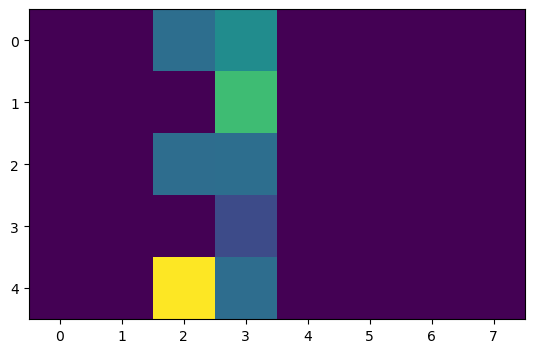

In [6]:
import matplotlib.pyplot as plt

plt.imshow(errors)